In [2]:
import numpy as np
import matplotlib.pyplot as plt

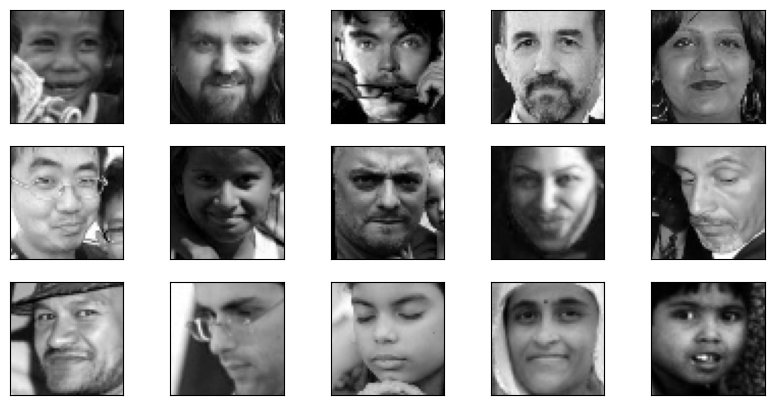

In [7]:
X = np.load("fairface.npy")
fig = plt.figure(figsize=(10, 5))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    idx = np.random.randint(0, len(X) - 1)
    ax.imshow(X[idx], cmap=plt.get_cmap("gray"))

In [12]:
X.shape

(4500, 56, 56)

## Part a

In [13]:
# we first reshape X into a 2D-array
X_reshaped = X.reshape(4500, 56 * 56)

In [17]:
# First centralize the data
X_centered = X_reshaped - np.mean(X_reshaped, axis = 0)
# find the covariance matrix
cov_matrix = np.cov(X_centered, rowvar = False)
# find the eigenvector and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [18]:
# find the sorted eigenvalues that with decreasing order
sorted_eigenvalues = np.sort(eigenvalues)[:: -1]

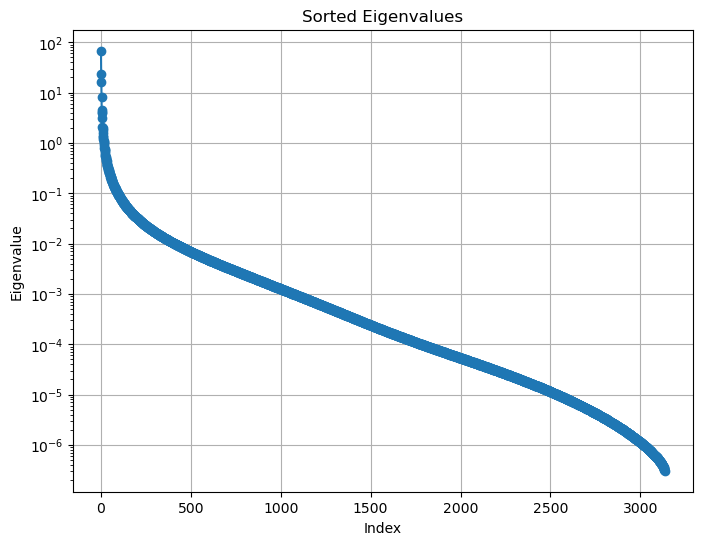

In [19]:
### start with the plot
plt.figure(figsize=(8, 6))
plt.semilogy(sorted_eigenvalues, marker='o', linestyle='-')
plt.title('Sorted Eigenvalues')
plt.xlabel('Index')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

In [20]:
## calculate the cumulative sum of eigenvalues
cum_variance = np.cumsum(sorted_eigenvalues)/np.sum(sorted_eigenvalues)
## Find the number of PC's so that explained 95% of total variation
num_PC_95 = np.searchsorted(cum_variance, 0.95) + 1
num_PC_99 = np.searchsorted(cum_variance, 0.99) + 1

In [22]:
print("The number of PC to explain 95% variation is:", num_PC_95, '\n')
print("The number of PC to explain 95% variation is:", num_PC_99, '\n')

The number of PC to explain 95% variation is: 143 

The number of PC to explain 95% variation is: 535 



In [191]:
print("The percentage reduction in dimension explained 95% variation is:", 1 - num_PC_95 / (56 * 56), '\n')
print("The percentage reduction in dimension explained 99% variation is:", 1 - num_PC_99 / (56 * 56), '\n')

The percentage reduction in dimension explained 95% variation is: 0.9544005102040817 

The percentage reduction in dimension explained 99% variation is: 0.8294005102040816 



## Part b

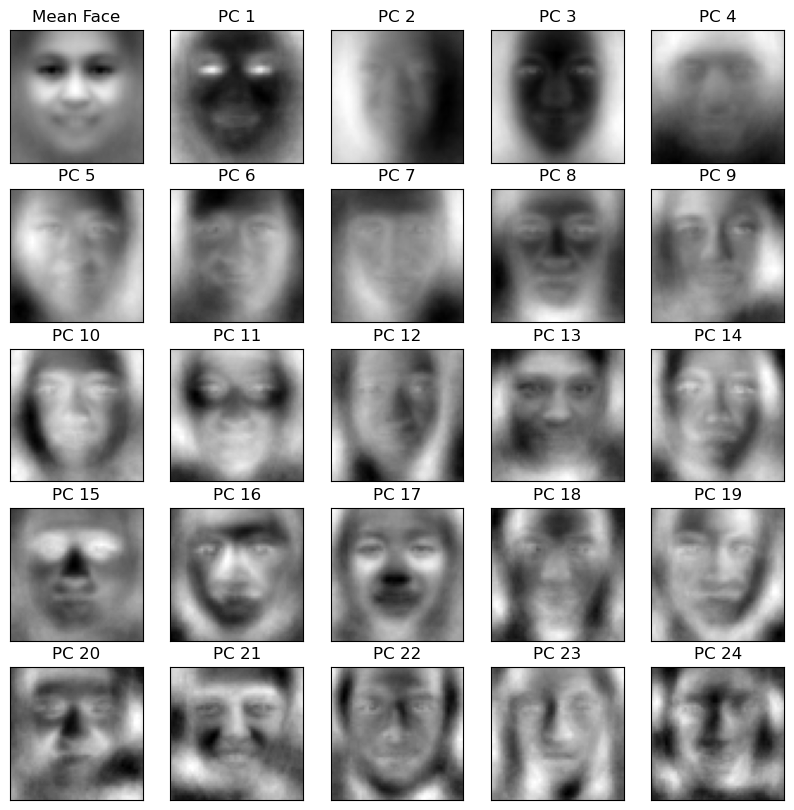

In [84]:
eigenfaces = eigenvectors.T.reshape((-1, 56, 56))  # Assuming images are 56x56 pixels

# Step 3: Create a 5x5 plot to display the mean image and first 24 principal components
fig = plt.figure(figsize=(10, 10))
for i in range(25):
    ax = fig.add_subplot(5, 5, i + 1, xticks=[], yticks=[])
    if i == 0:
        # Display the mean image as the first image
        ax.imshow(np.mean(X_reshaped, axis = 0).reshape(56, 56), cmap='gray')
        ax.set_title("Mean Face")
    else:
        # Display the ith principal component
        ax.imshow(eigenfaces[i - 1], cmap='gray')
        ax.set_title(f"PC {i}")
plt.show()

Notice that the first principle component captures the lighting variation of eyes, the third principle component may captures the face shape of a person. The 15th principle component may captures the light variation of nose.

## Part c

In [168]:
## For the second component
score_2 = np.dot(X_centered, eigenvectors.T[1])

## For the 17th component
score_11 = np.dot(X_centered, eigenvectors.T[10])

In [186]:
sorted_indices = np.argsort(-np.abs(score_2))
top_indices_2 = sorted_indices[: 5]

sorted_indices_11 = np.argsort(-np.abs(score_11))
top_indices_11 = sorted_indices_11[: 5]

In [187]:
top_indices_2

array([3840, 4438,  489, 4439, 4386], dtype=int64)

In [188]:
top_indices_11

array([3756, 1432, 4464,  963, 1433], dtype=int64)

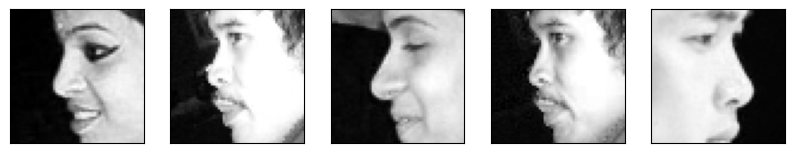

In [189]:
fig = plt.figure(figsize=(10, 5))
for i in range(5):
    ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
    idx = np.random.randint(0, len(X) - 1)
    ax.imshow(X[top_indices_2[i]], cmap=plt.get_cmap("gray"))

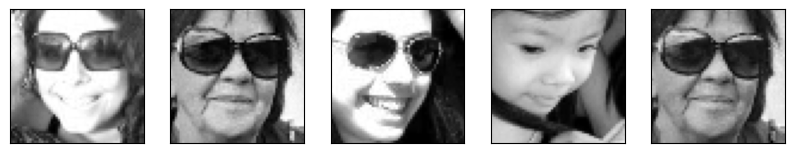

In [190]:
fig = plt.figure(figsize=(10, 5))
for i in range(5):
    ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
    idx = np.random.randint(0, len(X) - 1)
    ax.imshow(X[top_indices_11[i]], cmap=plt.get_cmap("gray"))